In [2]:
import os
import sys
import glob
import time
import datetime
import numpy as np
import pandas as pd
import sqlite3
import random
import math
import requests

In [3]:
playlist_path = "./Songs/"

## Open one of the playlists

In [9]:
rand_file = random.randint(0,1000)

In [10]:
df = pd.read_csv(playlist_path + f"songs{rand_file}.csv")

In [12]:
df.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,0,Major Lazer,spotify:track:4WjH9Bzt3kx7z8kl0awxh4,spotify:artist:738wLrAtLtCtFOLvQBXOXp,Lean On (feat. MØ & DJ Snake),spotify:album:2XBnxKeRZi76u2iyGcMych,176561,Peace Is The Mission
1,0,1,Miley Cyrus,spotify:track:2y4lAQpi5VTNLu2ldeTdUH,spotify:artist:5YGY8feqx7naU7z4HrwZM6,We Can't Stop,spotify:album:3RDqXDc1bAETps54MSSOW0,231240,Bangerz (Deluxe Version)
2,0,2,Tegan and Sara,spotify:track:4fT30Ghhn5p7vDtUtn9bdK,spotify:artist:5e1BZulIiYWPRm8yogwUYH,Drove Me Wild,spotify:album:5IUJ6v408Z7pECC3BXUJxX,229253,Heartthrob
3,0,3,blink-182,spotify:track:12qZHAeOyTf93YAWvGDTat,spotify:artist:6FBDaR13swtiWwGhX1WQsP,All The Small Things,spotify:album:1fF8kYX49s5Ufv4XEY5sjW,168000,Enema Of The State
4,0,4,Natalie Imbruglia,spotify:track:1Jaah2tmN9Hv81A87KZ1MU,spotify:artist:0dlOr0VIysztGWvU1dpjmP,Torn,spotify:album:38alWeQVP9UUAGJvLptys9,244666,Left Of The Middle


In [14]:
len(df.pid.unique())

1000

In [21]:
df.groupby("pid").pos.max().describe()

count    1000.00000
mean       62.79000
std        50.08807
min         4.00000
25%        25.00000
50%        48.00000
75%        87.00000
max       249.00000
Name: pos, dtype: float64

In [28]:
df.groupby("track_uri").pid.count().sort_values(ascending=False)

track_uri
spotify:track:7KXjTSCq5nL1LoYtL7XAwS    45
spotify:track:7BKLCZ1jbUBVqRi2FVlTVw    40
spotify:track:1xznGGDReH1oQq0xzbwXa3    39
spotify:track:7GX5flRQZVHRAGd6B4TmDO    38
spotify:track:7KOlJ92bu51cltsD9KU5I7    37
                                        ..
spotify:track:4nJz9vscAzanC1ryjOtoJo     1
spotify:track:4nKB7W7skS894mHSgWD8v7     1
spotify:track:4nNSgSfqhtAQ9upuIp1QgM     1
spotify:track:4nOKwZf1XRw2gI4FGAGhXf     1
spotify:track:3tAplt4FkuuOBYvMlfq8wA     1
Name: pid, Length: 34773, dtype: int64

In [31]:
df.loc[df['track_uri'] == "spotify:track:7KXjTSCq5nL1LoYtL7XAwS"].iloc[0]

pid                                                9
pos                                               97
artist_name                           Kendrick Lamar
track_uri       spotify:track:7KXjTSCq5nL1LoYtL7XAwS
artist_uri     spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg
track_name                                   HUMBLE.
album_uri       spotify:album:4eLPsYPBmXABThSJ821sqY
duration_ms                                   177000
album_name                                     DAMN.
Name: 686, dtype: object

## Create train/test dataframe from CSVs

In [1]:
# total = []
# for root, dirs, files in os.walk(playlist_path_jack):
#     files = glob.glob(os.path.join(root,'*'+'.csv'))
#     for f in files:
#         fid = int(f.split('/')[-1][5:].split('.')[0])
#         df = pd.read_csv(f)
#         df["fid"] = fid
#         total.append(df)
# processed_df = pd.concat(total, axis=0)
# processed_df.to_csv("playlist_data.csv", index=False)

## Popularity

In [72]:
# total = pd.DataFrame()
# random.seed(109)
# train_proportion = 0.6
# for root, dirs, files in os.walk(playlist_path_jack):
#     files = glob.glob(os.path.join(root,'*'+'.csv'))
#     train_files = random.sample(files, math.floor(len(files) * train_proportion))
#     test_files = list(set(files) - set(train_files))
#     for f in files[0:100]:
#         fid = int(f.split('/')[-1][5:].split('.')[0])
#         df = pd.read_csv(f)
#         most_common = df.groupby("track_uri").pid.count()        
#         total = pd.concat([total] + [most_common], axis=0)

In [77]:
popularity = total.groupby(level=0)[0].sum()

In [78]:
popularity.sort_values(ascending=False)

spotify:track:7KXjTSCq5nL1LoYtL7XAwS    4607.0
spotify:track:1xznGGDReH1oQq0xzbwXa3    4281.0
spotify:track:7yyRTcZmCiyzzJlNzGC9Ol    4139.0
spotify:track:7BKLCZ1jbUBVqRi2FVlTVw    4089.0
spotify:track:3a1lNhkSLSkpJE4MSHpDu9    3928.0
                                         ...  
spotify:track:4R55eLGAYEpn9tFaclCqrn       1.0
spotify:track:4R5D0ZxUfI2nPJVraTjW2x       1.0
spotify:track:4R5EYhS1HCuzB0gNfFfG5P       1.0
spotify:track:4R5FEwR2N8Q0ot9oZE7EXC       1.0
spotify:track:0002yNGLtYSYtc0X6ZnFvp       1.0
Name: 0, Length: 687376, dtype: float64

In [81]:
df.loc[df["track_uri"] == "spotify:track:1xznGGDReH1oQq0xzbwXa3"].iloc[0]

pid                                                6
pos                                               98
artist_name                                    Drake
track_uri       spotify:track:1xznGGDReH1oQq0xzbwXa3
artist_uri     spotify:artist:3TVXtAsR1Inumwj472S9r4
track_name                                 One Dance
album_uri       spotify:album:3hARKC8cinq3mZLLAEaBh9
duration_ms                                   173986
album_name                                     Views
Name: 356, dtype: object

## Check that the CSV works / Some EDA

In [4]:
full_df = pd.read_csv("playlist_data.csv")

In [5]:
full_df.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,fid
0,0,0,Sleeping At Last,spotify:track:2d7LPtieXdIYzf7yHPooWd,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",284
1,0,1,Rachael Yamagata,spotify:track:0y4TKcc7p2H6P0GJlt01EI,spotify:artist:7w0qj2HiAPIeUcoPogvOZ6,Elephants,spotify:album:6KzK9fDNmj7GHFbcE4gVJD,253701,Elephants...Teeth Sinking Into Heart,284
2,0,2,The Cinematic Orchestra,spotify:track:6q4c1vPRZREh7nw3wG7Ixz,spotify:artist:32ogthv0BdaSMPml02X9YB,That Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,103920,Ma Fleur,284
3,0,3,The Cinematic Orchestra,spotify:track:54KFQB6N4pn926IUUYZGzK,spotify:artist:32ogthv0BdaSMPml02X9YB,To Build A Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,371320,Ma Fleur,284
4,0,4,Leon Bridges,spotify:track:0NeJjNlprGfZpeX2LQuN6c,spotify:artist:3qnGvpP8Yth1AqSBMqON5x,River,spotify:album:4svLfrPPk2npPVuI4kXPYg,238560,Coming Home,284


In [110]:
songs_in_playlist = full_df.groupby(["fid", "pid"]).pos.max()

In [111]:
songs_in_playlist.describe()

count    1000000.000000
mean          65.346428
std           53.669358
min            4.000000
25%           25.000000
50%           48.000000
75%           91.000000
max          375.000000
Name: pos, dtype: float64

In [116]:
import matplotlib
import matplotlib.pyplot as plt

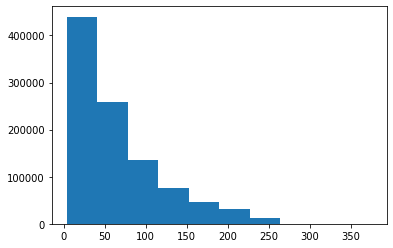

In [118]:
plt.hist(songs_in_playlist)
plt.show()

In [119]:
full_df.groupby(["fid", "pid", "artist_uri"]).pos.count().describe()

count    3.808821e+07
mean     1.741915e+00
std      2.747589e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.450000e+02
Name: pos, dtype: float64

Possible error in our data? Check this playlist.

In [1]:
full_df.groupby(["fid", "pid"]).duration_ms.sum() / 60000

NameError: name 'full_df' is not defined

In [134]:
duration[duration > 10000]

fid  pid
397  62     10584.5632
Name: duration_ms, dtype: float64

In [5]:
full_df.loc[(full_df["fid"] == 397) & (full_df["pid"] == 62)]

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,fid
33749240,62,0,Phil K,spotify:track:4s5nfXAXJVemLH7auEqG4O,spotify:artist:36WFgy2EYJpxwZua5iB8E7,The Therapy Sessions - Part 2 - Continuous DJ Mix,spotify:album:20v2jAxUMBCPkcuMfFr5Oq,4465733,Renaissance presents The Therapy Sessions,397
33749241,62,1,Deep Dish,spotify:track:5uuoc5ZxioFvcnaoX1fRV5,spotify:artist:720JYpdCgHuTmDeryW0wEA,Renaissance - The Masters Series - Part 2 - Ib...,spotify:album:0Y0vgViHbAXjzLqZAILmD6,4560475,Renaissance - The Masters Series - Part 2 - Ibiza,397
33749242,62,2,Sasha,spotify:track:4MGTS0EsKOuOIE7v2cCO8j,spotify:artist:6u4jLGLPuarS3i2XWHVxoS,Renaissance - The Mix Collection - Part 2 - Co...,spotify:album:0EfxuXSXhXfRGtteZ22eUu,4490440,Renaissance - The Mix Collection,397
33749243,62,3,Deep Dish,spotify:track:0jDhkKbW2B87MVQtJ8W3le,spotify:artist:720JYpdCgHuTmDeryW0wEA,Renaissance - The Masters Series - Part 2 - Ib...,spotify:album:0Y0vgViHbAXjzLqZAILmD6,4416402,Renaissance - The Masters Series - Part 2 - Ibiza,397
33749244,62,4,D:Fuse,spotify:track:1YqhtfXG4TIIaePmO0S6y8,spotify:artist:0BxH2B78Sy9Auh86NY9Rjr,People 3 (LIVE) [Disc 1] {Continuous DJ Mix By...,spotify:album:1pZVWZ1keVEw1e9XSSaGEY,4626360,People 3,397
...,...,...,...,...,...,...,...,...,...,...
33749451,62,211,Various Artists,spotify:track:49NF7rGAVxx7mhiUCDVxJF,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,DJ Mix 1 by DJ Faydz - Continuous DJ Mix 1,spotify:album:183oZsEsOG9hxZdG5zcopF,3660000,Future Rave Anthems 2 - Mixed by DJ Faydz,397
33749452,62,212,MYNC,spotify:track:5driHFK86qjDEalMjSJzvk,spotify:artist:19Pf5iv3VY9tSLbS3Y04t9,"Cr2 Presents LIVE & DIRECT - MYNC, Harry Choo ...",spotify:album:2fvpeALTK94AGVbWecOkn8,3814622,"Cr2 Presents LIVE & DIRECT - MYNC, Harry Choo ...",397
33749453,62,213,Harry Romero,spotify:track:37dh8QtQGxu0uZd6dDtb92,spotify:artist:36AJmodiIrwV9U3QOiLMYM,"Cr2 Presents LIVE & DIRECT - MYNC, Harry Choo ...",spotify:album:2fvpeALTK94AGVbWecOkn8,4775622,"Cr2 Presents LIVE & DIRECT - MYNC, Harry Choo ...",397
33749454,62,214,MYNC,spotify:track:5djfTFmDMkRtNYmoyMwBtS,spotify:artist:19Pf5iv3VY9tSLbS3Y04t9,Space Ibiza 2013 Continuous DJ Mix 2,spotify:album:01DlcGlswBdBUU3g9gSv14,4338382,Space Ibiza 2013,397


Upon inspection, this does seem to be a legitimate outlier, but the data seems correct.

In [133]:
duration.describe()

count    1000000.000000
mean         259.661281
std          214.273910
min            1.625633
25%           99.923050
50%          190.373967
75%          357.228129
max        10584.563200
Name: duration_ms, dtype: float64

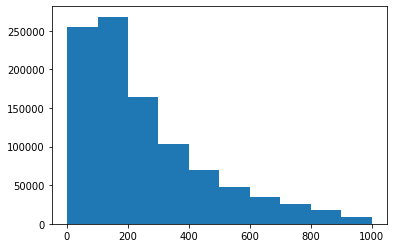

In [139]:
plt.hist(duration[duration < 1000])
plt.show()

# Idea: Pull track information from songs with # inclusions greater than k

In [7]:
unique_songs = full_df['track_uri'].unique()

In [9]:
len(unique_songs)

2262292

In [10]:
song_popularities = full_df.groupby("track_uri").pid.count()

In [12]:
song_popularities.sort_values(ascending = False, inplace=True)

In [49]:
top_songs = song_popularities[song_popularities > 100]

In [53]:
track_ids = list(top_songs.keys())

In [55]:
track_ids_filtered = [i.split(":")[-1] for i in track_ids]

In [93]:
",".join(track_ids_filtered[100:110])

'6i0V12jOa3mr6uu4WYhUBr,3yrSvpt2l1xhsV9Em88Pul,4pdPtRcBmOSQDlJ3Fk945m,20dP2DaMHIAmwWAbp7peSr,0IqKeD8ZSP72KbGYyzEcAs,6Ius4TC0L3cN74HT7ENE6e,2ANLarE8yHVsLWW21nj79M,6ZYS6QQxTLsQ6IFXdVx1r4,40riOy7x9W7GXjyGp4pjAv,4tCtwWceOPWzenK2HAIJSb'

In [1]:
song_popularities[-1]

NameError: name 'song_popularities' is not defined

### Finished Code

In [58]:
spotify_key_file = "spotify.txt"
with open(spotify_key_file, "r") as f:
    api_key = f.readline()[:-1]

In [139]:
def fetch_song_df(track_ids_filtered, api_key):
    BASE_URL = "https://api.spotify.com/v1/audio-features?ids="
    features_dfs = []
    for i in range(0, len(track_ids_filtered), 100):
        # print(i)
        end = i+100 if i+100 < len(track_ids_filtered) else len(track_ids_filtered)
        response = requests.get(BASE_URL + ",".join(track_ids_filtered[i:end]), 
                                headers = {"Authorization": "Bearer " + api_key})
        while response.status_code != 200:
            if response.status_code == 429:
                retry_after = int(response.headers['Retry-After'])
                print(f"Too many requests. Sleeping for {retry_after} seconds.")
                time.sleep(retry_after)
            else:
                print("Request failed! Trying again in 2 seconds.")
                time.sleep(2)
            response = requests.get(BASE_URL + ",".join(track_ids_filtered[i:end]), 
                                    headers = {"Authorization": "Bearer " + api_key})
        if "audio_features" in response.json():
            features_dfs.append(response.json()["audio_features"])
    
    # filter out jsons that are None!
    df_list = []
    for request in features_dfs:
        for i in request:
            if i:
                df_list.append(i)
    return pd.DataFrame(df_list)

## Chose a SRS to use for EDA

In [14]:
song_70k = pd.read_csv("top70ksongs.csv")

In [96]:
sz = 50000
music_ids = random.sample(list(unique_songs), sz)

In [113]:
to_fetch = []
others = []
ids = set(song_70k['uri'])

for i in music_ids:
    if i not in ids:
        to_fetch.append(i.split(":")[-1])
    else:
        others.append(i.split(":")[-1])

In [114]:
len(to_fetch)

48426

In [144]:
srs_songs = fetch_song_df(to_fetch, "BQDzEP95kSDX01-GgDor9AKtlJmjZ_FA6astKW-g0WKFisLDdFay0IbYtc-KHlEnXPSWLwx1n7OHHt98GFGf24ZkCAKH3k1k1XjuW01QFriOO1wBLmF-J7LFDts0x8CHHRfOLhSrETMZgeS-g4DgeusD71mNN96DkOQ")

In [145]:
len(srs_songs)

48422

In [146]:
srs_sample = pd.concat([srs_songs, song_70k.loc[song_70k["id"].isin(others)]], axis=0).reset_index(drop=True)

In [147]:
srs_sample.to_csv("50k_srs_songs.csv", index=False)

In [173]:
# pd.read_csv("50k_srs_songs.csv")

## Get a few playlists fully

In [190]:
total_songs = pd.read_csv("total_songs.csv")
song_ids = set(total_songs['uri'])

In [191]:
file = random.choices(list(range(1000)), k=50)
playlists = random.choices(list(range(1000)), k=50)

In [192]:
to_fetch = set()
all_playlists = []
for fid, pid in zip(file, playlists):
    playlist = full_df.loc[(full_df["fid"] == fid) & (full_df["pid"] == pid)]
    all_playlists.append(playlist)
    sids = playlist["track_uri"]
    for sid in sids:
        if sid not in song_ids:
            to_fetch.add(sid.split(":")[-1])
            song_ids.add(sid)

In [193]:
playlists_df = pd.concat(all_playlists, axis=0)

In [198]:
playlist_songs = fetch_song_df(list(to_fetch), "BQDzEP95kSDX01-GgDor9AKtlJmjZ_FA6astKW-g0WKFisLDdFay0IbYtc-KHlEnXPSWLwx1n7OHHt98GFGf24ZkCAKH3k1k1XjuW01QFriOO1wBLmF-J7LFDts0x8CHHRfOLhSrETMZgeS-g4DgeusD71mNN96DkOQ")

In [199]:
total_songs = pd.concat([total_songs, playlist_songs], axis=0)

In [200]:
total_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.369,0.2230,9,-15.993,1,0.0564,0.957000,0.860000,0.1240,0.212,87.067,audio_features,3R8bbBLfCrl3wXELLDuZiA,spotify:track:3R8bbBLfCrl3wXELLDuZiA,https://api.spotify.com/v1/tracks/3R8bbBLfCrl3...,https://api.spotify.com/v1/audio-analysis/3R8b...,196733,4
1,0.664,0.6050,4,-5.477,0,0.2580,0.242000,0.000000,0.1610,0.397,85.690,audio_features,5Zk7ELDEXqcHZk2euHPVb9,spotify:track:5Zk7ELDEXqcHZk2euHPVb9,https://api.spotify.com/v1/tracks/5Zk7ELDEXqcH...,https://api.spotify.com/v1/audio-analysis/5Zk7...,192320,4
2,0.740,0.7120,9,-7.260,0,0.0814,0.071800,0.000000,0.3300,0.742,90.011,audio_features,5tg8mN8KqRfwIvkXF0tRr4,spotify:track:5tg8mN8KqRfwIvkXF0tRr4,https://api.spotify.com/v1/tracks/5tg8mN8KqRfw...,https://api.spotify.com/v1/audio-analysis/5tg8...,276093,4
3,0.623,0.8630,1,-8.161,0,0.0776,0.000811,0.000002,0.1280,0.734,95.814,audio_features,10qeFHxbayfrkH2kX9kTnv,spotify:track:10qeFHxbayfrkH2kX9kTnv,https://api.spotify.com/v1/tracks/10qeFHxbayfr...,https://api.spotify.com/v1/audio-analysis/10qe...,136067,4
4,0.413,0.0302,10,-26.692,1,0.0350,0.957000,0.443000,0.1130,0.254,87.286,audio_features,18LVcYNiF05oDfEQ7HEhNR,spotify:track:18LVcYNiF05oDfEQ7HEhNR,https://api.spotify.com/v1/tracks/18LVcYNiF05o...,https://api.spotify.com/v1/audio-analysis/18LV...,233627,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,0.680,0.8460,0,-4.767,0,0.0458,0.031600,0.000001,0.3240,0.676,124.993,audio_features,2h1p2FqkI0xaVbqTjrUGKx,spotify:track:2h1p2FqkI0xaVbqTjrUGKx,https://api.spotify.com/v1/tracks/2h1p2FqkI0xa...,https://api.spotify.com/v1/audio-analysis/2h1p...,235840,4
790,0.448,0.5360,8,-6.808,0,0.0343,0.775000,0.000020,0.0912,0.489,80.058,audio_features,1uJHTR9nLgF0AZL9QgH0wl,spotify:track:1uJHTR9nLgF0AZL9QgH0wl,https://api.spotify.com/v1/tracks/1uJHTR9nLgF0...,https://api.spotify.com/v1/audio-analysis/1uJH...,165400,4
791,0.835,0.3090,11,-16.254,0,0.0384,0.781000,0.002220,0.0674,0.813,125.172,audio_features,2dOF2NUuOkuxskCqYfKbUt,spotify:track:2dOF2NUuOkuxskCqYfKbUt,https://api.spotify.com/v1/tracks/2dOF2NUuOkux...,https://api.spotify.com/v1/audio-analysis/2dOF...,195907,4
792,0.692,0.9300,11,-5.564,0,0.0333,0.000346,0.054800,0.3410,0.596,120.026,audio_features,1tbat9rrKZWaD5EqH4clTJ,spotify:track:1tbat9rrKZWaD5EqH4clTJ,https://api.spotify.com/v1/tracks/1tbat9rrKZWa...,https://api.spotify.com/v1/audio-analysis/1tba...,202573,4


In [201]:
complete_playlists = playlists_df.join(total_songs.set_index("uri").drop("duration_ms", axis=1), on="track_uri").reset_index(drop=True)

In [202]:
complete_playlists.to_csv("complete_playlists_50.csv", index=False)

In [203]:
complete_playlists

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,fid,...,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,time_signature
0,557,0,50 Cent,spotify:track:1wI3UvluGGKUeFeVFsP9do,spotify:artist:3q7HBObVc0L8jNeTe5Gofh,Best Friend - Remix,spotify:album:27GrIQPCPtPyEUxONxAcRe,254493,Best Friend,354,...,0.40700,0.000000,0.1220,0.569,181.818,audio_features,1wI3UvluGGKUeFeVFsP9do,https://api.spotify.com/v1/tracks/1wI3UvluGGKU...,https://api.spotify.com/v1/audio-analysis/1wI3...,4
1,557,1,Vedo,spotify:track:5Wcw2hbK2bXYlNpEb07gL5,spotify:artist:3wVXTWabe3viT0jF7DfjOL,4 Walls,spotify:album:3A8RsxbFtSzRU2hs7eT1UL,211810,93,354,...,0.73300,0.000000,0.1500,0.739,127.955,audio_features,5Wcw2hbK2bXYlNpEb07gL5,https://api.spotify.com/v1/tracks/5Wcw2hbK2bXY...,https://api.spotify.com/v1/audio-analysis/5Wcw...,4
2,557,2,Destiny's Child,spotify:track:0FZvjrHpAmLKj574M4VwrF,spotify:artist:1Y8cdNmUJH7yBTd9yOvr5i,Cater 2 U,spotify:album:3xjdyJjSMNsSRkj3GTmBLi,245400,Destiny Fulfilled,354,...,0.28600,0.000000,0.2350,0.464,125.802,audio_features,0FZvjrHpAmLKj574M4VwrF,https://api.spotify.com/v1/tracks/0FZvjrHpAmLK...,https://api.spotify.com/v1/audio-analysis/0FZv...,4
3,557,3,Vedo,spotify:track:6WqmzH7FQDwCaqabn2xz2g,spotify:artist:3wVXTWabe3viT0jF7DfjOL,All Your Love,spotify:album:6CxKRU4KeLPHByLbe3ecwe,200543,State of Mind - EP,354,...,0.71000,0.000000,0.1540,0.511,69.619,audio_features,6WqmzH7FQDwCaqabn2xz2g,https://api.spotify.com/v1/tracks/6WqmzH7FQDwC...,https://api.spotify.com/v1/audio-analysis/6Wqm...,3
4,557,4,Bow Wow,spotify:track:5dLvErR6RBbMMvGuDMdur2,spotify:artist:7352aRY2mqSxBZwzUb6LmA,Like You,spotify:album:1dQGXePMNkrSavN2pxF48a,205640,Playlist: The Very Best Of Bow Wow,354,...,0.05040,0.000000,0.0746,0.501,81.900,audio_features,5dLvErR6RBbMMvGuDMdur2,https://api.spotify.com/v1/tracks/5dLvErR6RBbM...,https://api.spotify.com/v1/audio-analysis/5dLv...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,794,27,B.o.B,spotify:track:3myI1o0izYfh2z9JTQzCfJ,spotify:artist:5ndkK3dpZLKtBklKjxNQwT,Don't Let Me Fall - Explicit Album Version,spotify:album:7apLPYT8szV1IqTxyVSy5P,275386,B.o.B Presents: The Adventures of Bobby Ray,346,...,0.00631,0.000000,0.2130,0.267,150.187,audio_features,3myI1o0izYfh2z9JTQzCfJ,https://api.spotify.com/v1/tracks/3myI1o0izYfh...,https://api.spotify.com/v1/audio-analysis/3myI...,4
3592,794,28,Lana Del Rey,spotify:track:3BJe4B8zGnqEdQPMvfVjuS,spotify:artist:00FQb4jTyendYWaN8pK0wa,Summertime Sadness,spotify:album:5VoeRuTrGhTbKelUfwymwu,265427,Born To Die - The Paradise Edition,346,...,0.05420,0.000002,0.1220,0.235,111.968,audio_features,3BJe4B8zGnqEdQPMvfVjuS,https://api.spotify.com/v1/tracks/3BJe4B8zGnqE...,https://api.spotify.com/v1/audio-analysis/3BJe...,4
3593,794,29,Big Sean,spotify:track:6bxUnsSGZCmoHHU5auwtps,spotify:artist:0c173mlxpT3dSFRgMO8XPh,Beware,spotify:album:5RlT8X7XGGLKUhoimrDl54,235186,Hall Of Fame,346,...,0.21700,0.000000,0.4520,0.062,97.219,audio_features,6bxUnsSGZCmoHHU5auwtps,https://api.spotify.com/v1/tracks/6bxUnsSGZCmo...,https://api.spotify.com/v1/audio-analysis/6bxU...,4
3594,794,30,Ivan Gough,spotify:track:6Tufi5UMuDeN0QMYlkVJB1,spotify:artist:5aBWZE8TOaaA9O50ENS3EM,In My Mind (feat. Georgi Kay) - Axwell Mix,spotify:album:08XPxjZg6MQRWnHiSnoXLH,398121,In My Mind (feat. Georgi Kay),346,...,0.04580,0.001220,0.2690,0.296,127.987,audio_features,6Tufi5UMuDeN0QMYlkVJB1,https://api.spotify.com/v1/tracks/6Tufi5UMuDeN...,https://api.spotify.com/v1/audio-analysis/6Tuf...,4


In [204]:
total_songs.to_csv("total_songs.csv", index = False)